<a href ="" target= "https://drive.google.com/file/d/1wOHk4v60bdMP_EZiQOn6uMvILo3cXggl/view?usp=sharing"><img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Open in Colab"/></a>

# Gaussian Maximum Likelihood

##  MLE of a  Gaussian $p_{model}(x|w)$

You are given an array of data points called `data`. Your course site plots the negative log-likelihood  function for several candidate hypotheses. Estimate the parameters of the Gaussian $p_{model}$ by  coding an implementation that estimates its optimal parameters (15 points) and explaining what it does (10 points). You are free to use any Gradient-based optimization method you like.  

This code implements **Gradient Descent** to estimate the optimal parameters of a Gaussian distribution that best fit the given dataset. 


The probability density function of the univariate (one-dimensional) Gaussian distribution as well as Gaussian likelihood function is:

$$ \mathcal{N}(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} , \mathrm{e}^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$

where $\mathcal{N}$ represents the Gaussian distribution, $x$ is the input value, $\mu$ is the mean of the distribution, $\sigma$ is the standard deviation of the distribution.

The negative log-likelihood (NLL) is written by taking the negative logarithm of the Gaussian likelihood function:

$$\text{NLL}(\mu, \sigma^2) = -\sum_{i=1}^{n} \log \text{gaussian}(x_i | \mu, \sigma)$$

NLL for a single observation from Gaussian distribution is:

$$\text{NLL}(\mu, \sigma^2;x) = \frac{1}{2}\left[\log(\sigma^2) + \frac{(x - \mu)^2}{\sigma^2}\right]$$

So the gradient of NLL with respect to $\mu$ and $\sigma$ is:

\begin{aligned}
\frac{\partial \text{NLL}}{\partial \mu} &= \frac{x-\mu}{\sigma^2}
\end{aligned}

and

\begin{aligned}
\frac{\partial \text{NLL}}{\partial \sigma} &= \frac{(x-\mu)^2-\sigma^2}{\sigma^3}
\end{aligned}


Explain steps:

1.   Process the input data, x
2.   Define the Gaussian distribution with two parameters ($\mu$ and $\sigma$)
3.   Define loss function - NLL
4.   Compute the gradients of NLL function with respect to parameters $\mu$ and $\sigma$
5.   Update parameter values by taking a step in the direction of the negative gradient: 
params = params - learning_rate*gradients.

     Here, learning_rate can be fixed as 0.01 or 0.001 but I would like to determine the learning rate (eta) at each iteration, so I implement learning schedule

6.   Repeat steps 3-5 until convergence
7.   Return the optimal parameter values: Once convergence is reached, return the optimal values of $\mu$ and $\sigma$ that minimize the NLL function and best fit the input data. 



Optimal parameters: mu=6.214285515492166, sigma=2.425418120907246

Actual parameters: mu=6.214285714285714, sigma=2.425418120907092


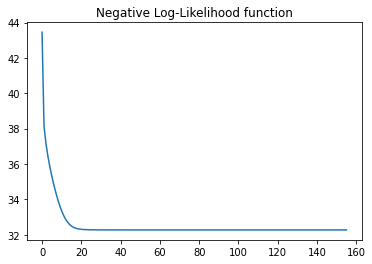

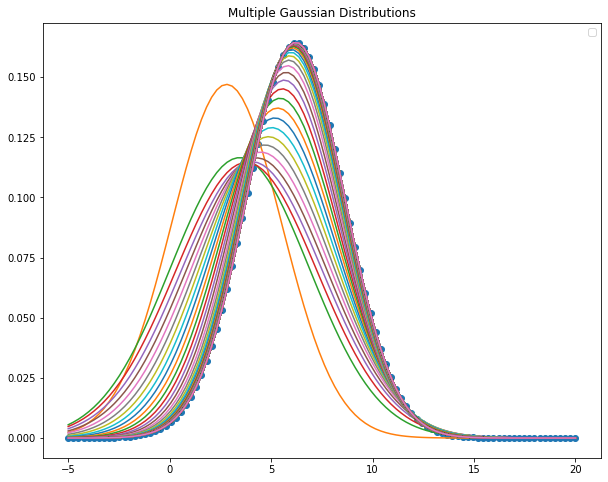

In [51]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def gaussian(x, mean, std_dev):
  return norm.pdf(x, mean, std_dev)

# define the negative log-likelihood function
def neg_log_likelihood(params, data):
    mu, sigma = params
    log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return -log_likelihood

# define the gradient of the negative log-likelihood function
def grad_neg_log_likelihood(params, data):
    mu, sigma = params
    dmu = np.sum((data - mu) / sigma**2)
    dsigma = np.sum(((data - mu)**2 - sigma**2) / sigma**3)
    return np.array([-dmu, -dsigma])

def learning_schedule(t):
    t0, t1 = 5, 50  # learning schedule hyperparameters
    return t0 / (t + t1)

# implement gradient descent
def gradient_descent(data, mu, sigma, learning_rate=0.01, n_epochs=1000):
    params_history = []
    nll_history = []
    params = np.array([mu, sigma])
    params_history.append(params)
    nll = neg_log_likelihood(params, data)
    nll_history.append(nll)
    # loop through iterations
    for i in range(n_epochs):
        params_history.append(params.tolist())
        # calculate gradient
        grad = grad_neg_log_likelihood(params, data)
        eta = learning_schedule(i)
        # update parameters
        params -= eta * grad
        nll_curr = neg_log_likelihood(params, data)
        if nll_curr >= nll:
          break #early stopping
        nll = min(nll,nll_curr)
        nll_history.append(nll)
    return params, params_history, nll, nll_history

# simulations
def plot_gaussian_distribution(params):
  x = np.linspace(-5, 20, 100)
  plt.figure(figsize=(10, 8)) # specify size of figure
  for param in params:
    mu, sigma = param
    plt.plot(x, gaussian(x,mu, sigma))
  plt.scatter(x,gaussian(x,np.mean(data), np.std(data)))
  plt.legend()
  plt.title("Multiple Gaussian Distributions")
  plt.show()

def plot_neg_log_likelihood(nll_history):
  plt.title("Negative Log-Likelihood function")
  plt.plot(nll_history)

data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
# initialize variables
mu_init = np.random.uniform(low=0, high=10)
sigma_init = np.random.uniform(low=0, high=5)

# run gradient descent
params, params_history, nll, nll_history = gradient_descent(data, mu_init, sigma_init, learning_rate=0.01, n_epochs=1000)
print(f"Optimal parameters: mu={params[0]}, sigma={params[1]}\n")
print(f"Actual parameters: mu={np.mean(data)}, sigma={np.std(data)}")

# simulations
plot_neg_log_likelihood(nll_history)
plot_gaussian_distribution(params_history)

## MLE of a conditional Gaussian $p_{model}(y|x,w)$

You are given a problem that involves the relationship between $x$ and $y$. Estimate the parameters of a $p_{model}$ that fit the dataset (x,y) shown below.   You are free to use any Gradient-based optimization method you like.  


Actual parameters: Intercept=-2.5915934755332515, Slope=1.036386449184442, Minimum cost =15.615798828941866

Optimal parameters: Intercept=[-2.42065986], Slope=[1.03198638], Minimum cost =15.61912839560748


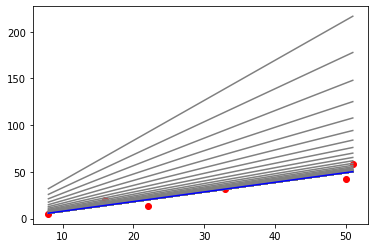

In [50]:
from matplotlib.projections.polar import ThetaLocator
import numpy as np
import matplotlib.pyplot as plt

X = np.array([8, 16, 22, 33, 50, 51])
Y = np.array([5, 20, 14, 32, 42, 58])
m = len(X)

# define Mean Squared Error (MSE) cost function
def compute_mse(x, Y, theta):
    J = (1/(2*m))*np.sum((x.dot(theta)-Y)**2)
    return J

# print actual values of theta and minimum cost
slope, intercept = np.polyfit(X, Y, 1)
print(f"Actual parameters: Intercept={intercept}, Slope={slope}, Minimum cost ={compute_mse(np.vstack((np.ones(m), X)).T,Y,np.array([intercept, slope]))}\n")

# reshape into column vectors
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


# gradient descent 
def gradient_descent(X, Y, theta, eta, n_epochs):
    J_history = np.zeros(n_epochs)
    theta_history = np.zeros((n_epochs, 2, 1))
    for n in range(n_epochs):
        gradients = (2/m)*(X_b.T.dot(X_b.dot(theta)-Y))
        # update parameters
        theta = theta - eta*gradients
        theta_history[n] = theta
        J_history[n] = compute_mse(X_b, Y, theta)
    return theta, J_history, theta_history

def plot(theta_history, theta_best):
    # plot data and line of best fit
    for theta in theta_history:
        plt.plot(X, X_b.dot(theta), color='grey')
    plt.plot(X, X_b.dot(theta_best), color='blue')
    plt.scatter(X, Y, color='red')
    plt.show()

# initialize variables
eta = 0.0001 # learning rate
theta = np.random.randn(2,1)*5

# add x0 = 1 to each instance
X_b = np.c_[np.ones((m, 1)), X]

# run gradient descent
n_epochs = 1000
theta, J_history, theta_history = gradient_descent(X, Y, theta, eta, n_epochs)

# print optimal values of theta and minimum cost
print(f"Optimal parameters: Intercept={theta[0]}, Slope={theta[1]}, Minimum cost ={np.min(J_history)}")

# simulations
plot(theta_history, theta)